In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as plt

In [3]:
df_house_price = pd.read_csv('/content/drive/MyDrive/Melbourne_housing_FULL.csv')

In [4]:
pd.set_option('display.max_columns', None)
df_house_price.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/9/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/2/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/2/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/3/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [5]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
percent_missing = df_house_price.isnull().sum() * 100 / len(df_house_price)
percent_missing

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            21.832057
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.002869
Postcode          0.002869
Bedroom2         23.573457
Bathroom         23.599277
Car              25.039447
Landsize         33.881286
BuildingArea     60.576068
YearBuilt        55.386293
CouncilArea       0.008607
Lattitude        22.882061
Longtitude       22.882061
Regionname        0.008607
Propertycount     0.008607
dtype: float64

In [7]:
df_house_price = df_house_price.drop(['Address','Longtitude', 'Lattitude','Suburb', 'SellerG', 'CouncilArea'], axis=1)
df_house_price.shape

(34857, 15)

In [8]:
df_house_price.dropna(subset=["Price"], inplace=True)
print(df_house_price.shape)
percent_missing = df_house_price.isnull().sum() * 100 / len(df_house_price)
percent_missing

(27247, 15)


Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
Date              0.000000
Distance          0.003670
Postcode          0.003670
Bedroom2         23.639300
Bathroom         23.661321
Car              25.044959
Landsize         34.003744
BuildingArea     60.891107
YearBuilt        55.650163
Regionname        0.011010
Propertycount     0.011010
dtype: float64

<Axes: title={'center': 'Rooms'}, ylabel='Frequency'>

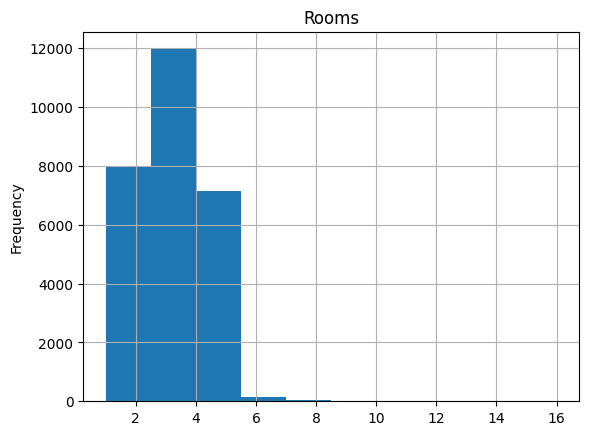

In [9]:
df_house_price['Rooms'].plot(kind = 'hist', grid = True, title = 'Rooms')

In [10]:
df_house_price.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount
count,27247.000000,2.724700e+04,27246.000000,27246.000000,20806.000000,20800.000000,20423.000000,17982.000000,10656.000000,12084.000000,27244.000000
mean,2.992293,1.050173e+06,11.280276,3113.796080,3.046237,1.591683,1.715370,593.488933,156.834586,1966.609153,7566.781089
std,0.954795,6.414671e+05,6.787469,111.139676,0.955122,0.700880,0.994216,3757.266429,449.222791,36.762373,4492.382418
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,83.000000
25%,2.000000,6.350000e+05,6.400000,3046.000000,2.000000,1.000000,1.000000,219.000000,100.000000,1950.000000,4294.000000
50%,3.000000,8.700000e+05,10.500000,3088.000000,3.000000,1.000000,2.000000,512.000000,133.000000,1970.000000,6567.000000
75%,4.000000,1.295000e+06,14.000000,3153.000000,4.000000,2.000000,2.000000,664.000000,182.000000,2000.000000,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,20.000000,9.000000,18.000000,433014.000000,44515.000000,2019.000000,21650.000000


In [11]:
df_house_price['Rooms'].value_counts()

Rooms
3     11957
2      6787
4      5918
5      1209
1      1196
6       137
7        20
8        14
10        5
12        2
9         1
16        1
Name: count, dtype: int64

In [12]:
df_house_price['Price'].head()

1    1480000.0
2    1035000.0
4    1465000.0
5     850000.0
6    1600000.0
Name: Price, dtype: float64

In [13]:
df_house_price.loc[df_house_price['Bedroom2'] == 20]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
12043,3,h,1650000.0,PI,6/8/2016,9.3,3145.0,20.0,1.0,2.0,875.0,NaN,NaN,Southern Metropolitan,608.0


In [14]:
df_house_price.loc[df_house_price['Bedroom2'] == 30]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount


In [15]:
df_house_price.loc[df_house_price['Bedroom2'] == 16]

,Rooms,Type,Price,Method,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
26210,16,h,5000000.0,S,28/10/2017,17.2,3132.0,16.0,8.0,8.0,NaN,NaN,NaN,Eastern Metropolitan,6871.0


<Axes: title={'center': 'Regionname Counts'}, xlabel='Regionname'>

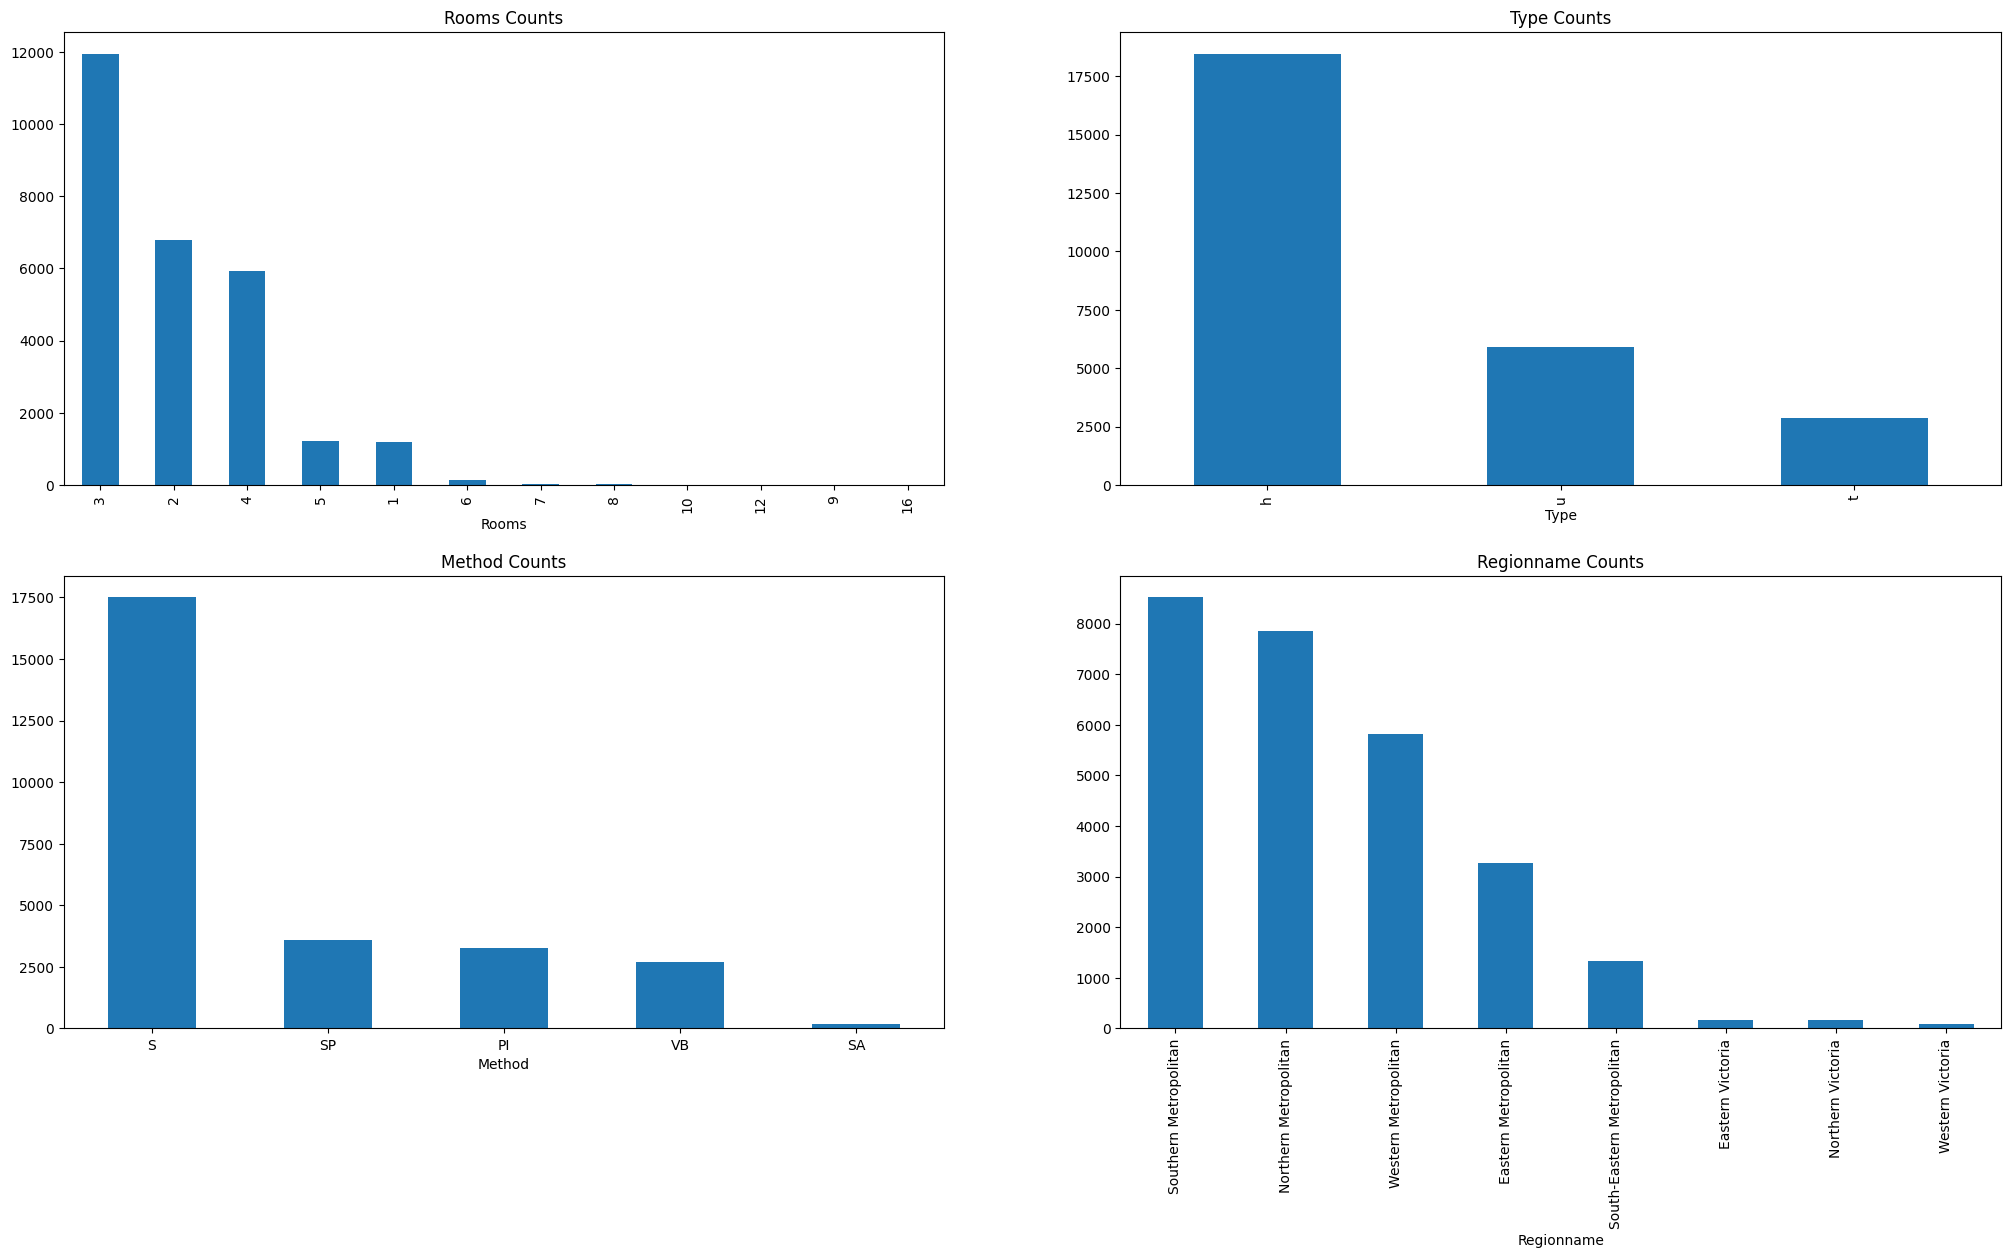

In [16]:
# Set up a grid of plots
fizsize_with_subplots = (25,20)
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3, 2)

# Plot Rooms counts
plt.subplot2grid(fig_dims, (0, 0))
df_house_price['Rooms'].value_counts().plot(kind='bar',
                                         title='Rooms Counts')

# Plot Type counts
plt.subplot2grid(fig_dims, (0, 1))
df_house_price['Type'].value_counts().plot(kind='bar',
                                       title='Type Counts')

# Plot Method counts
plt.subplot2grid(fig_dims, (1, 0))
df_house_price['Method'].value_counts().plot(kind='bar',
                                    title='Method Counts')
plt.xticks(rotation=0)

# Plot Regionname counts
plt.subplot2grid(fig_dims, (1, 1))
df_house_price['Regionname'].value_counts().plot(kind='bar',
                                         title='Regionname Counts')

<Axes: title={'center': 'Bathroom Counts'}, xlabel='Bathroom'>

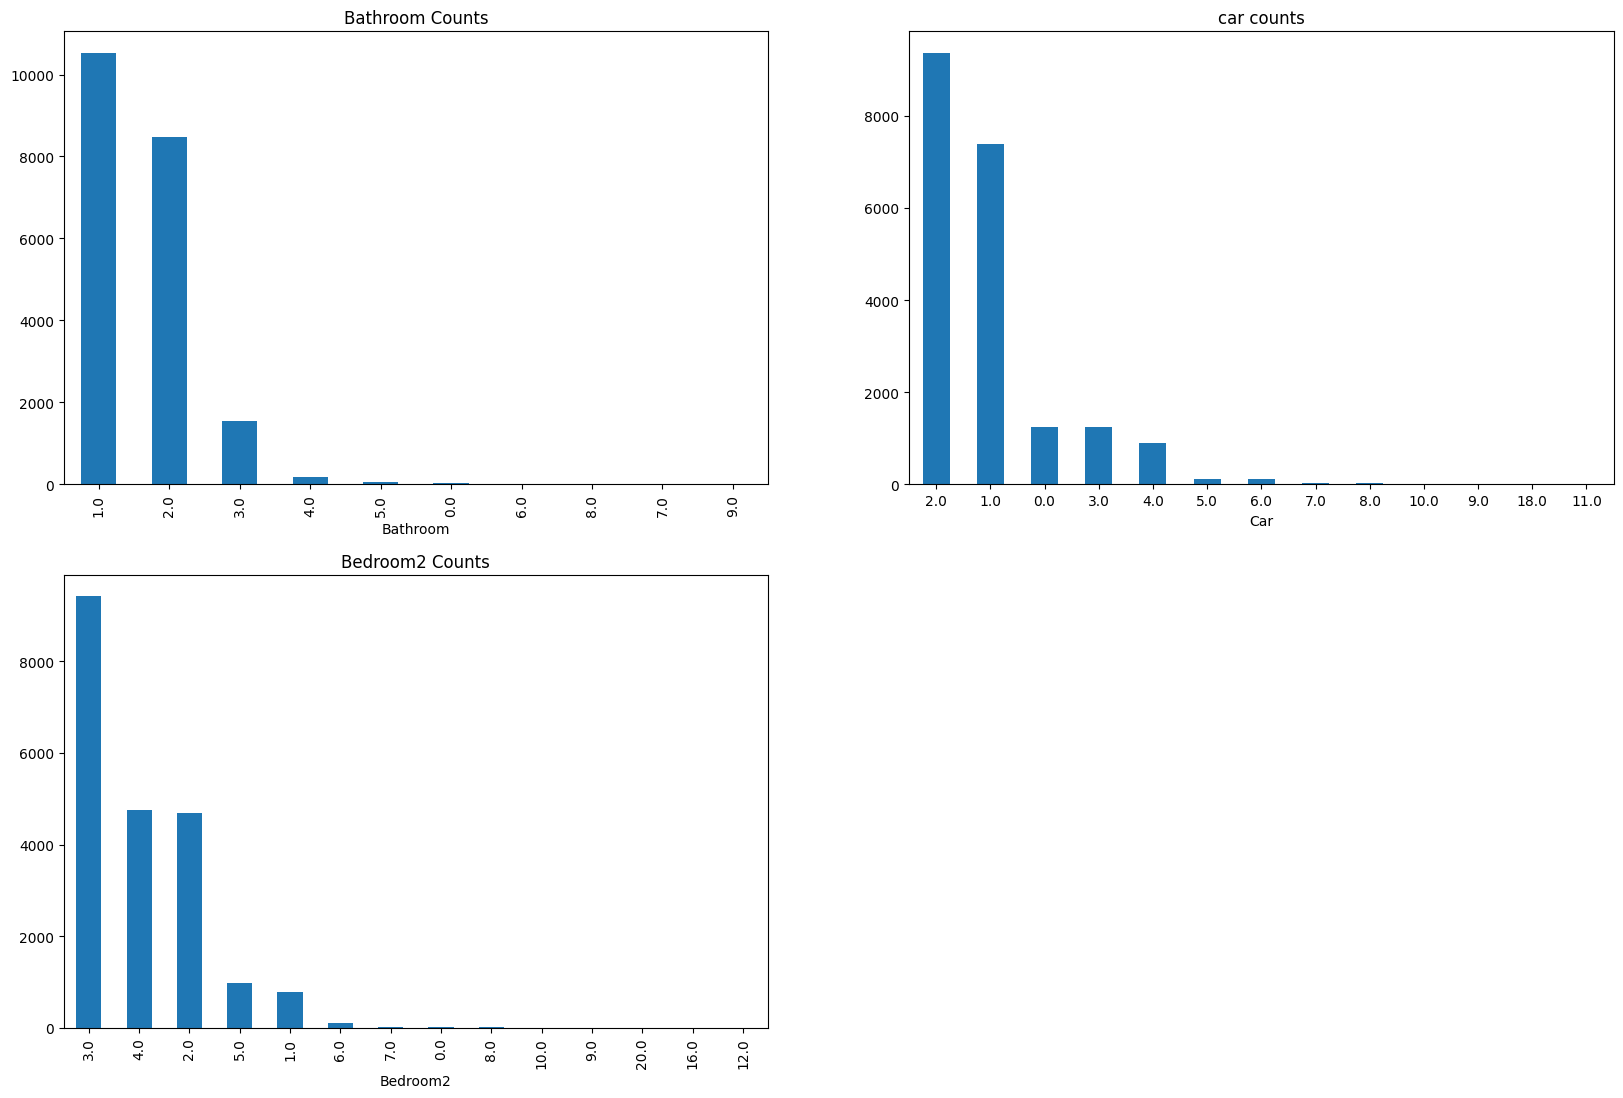

In [17]:
# Set up a grid of plots
fizsize_with_subplots = (20, 20)
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3,2)


# Plot Bedroom2 counts
plt.subplot2grid(fig_dims, (1,0))
df_house_price['Bedroom2'].value_counts().plot(kind='bar',
                                         title='Bedroom2 Counts')

# Plot Car counts
plt.subplot2grid(fig_dims, (0, 1))
df_house_price['Car'].value_counts().plot(kind='bar',title= 'car counts')

plt.xticks(rotation=0)

# Plot Bathroom counts
plt.subplot2grid(fig_dims, (0, 0))
df_house_price['Bathroom'].value_counts().plot(kind='bar',
                                    title='Bathroom Counts')

#Imputing missing values


In [18]:
# There are mising values in Bedroom2 which is replaced by  the mode value
df_house_price['Bedroom2'].fillna(df_house_price['Bedroom2'].mode()[0], inplace = True)
df_house_price['Bedroom2'].value_counts()

Bedroom2
3.0     15857
4.0      4766
2.0      4696
5.0       983
1.0       781
6.0       110
7.0        19
0.0        16
8.0         9
10.0        4
9.0         3
20.0        1
16.0        1
12.0        1
Name: count, dtype: int64

In [19]:
# There are mising values in Postcode which is replaced by  the mode value
df_house_price['Postcode'].fillna(df_house_price['Postcode'].mode()[0], inplace = True)
df_house_price['Postcode'].value_counts()

Postcode
3073.0    728
3046.0    545
3020.0    544
3165.0    493
3121.0    489
         ... 
3793.0      1
3428.0      1
3770.0      1
3786.0      1
3139.0      1
Name: count, Length: 209, dtype: int64

In [20]:
# There are mising values in Bathroom which is replaced by  the mode value
df_house_price['Bathroom'].fillna(df_house_price['Bathroom'].mode()[0], inplace = True)
df_house_price['Bathroom'].value_counts()

Bathroom
1.0    16974
2.0     8464
3.0     1537
4.0      176
5.0       46
0.0       34
6.0       10
8.0        3
7.0        2
9.0        1
Name: count, dtype: int64

In [21]:
# There are mising values in Car which is replaced by  the mode value
df_house_price['Car'].fillna(df_house_price['Car'].mode()[0], inplace = True)
df_house_price['Car'].value_counts()

Car
2.0     16191
1.0      7400
0.0      1251
3.0      1234
4.0       907
5.0       113
6.0       105
7.0        19
8.0        18
10.0        5
9.0         2
18.0        1
11.0        1
Name: count, dtype: int64

In [22]:
# There are mising values in YearBuilt which is replaced by  the median value
df_house_price['YearBuilt'].fillna(df_house_price['YearBuilt'].median(), inplace = True)
df_house_price['YearBuilt'].describe()

count    27247.000000
mean      1968.496165
std         24.539477
min       1196.000000
25%       1970.000000
50%       1970.000000
75%       1970.000000
max       2019.000000
Name: YearBuilt, dtype: float64

In [23]:
# There are mising values in BuildingArea which is replaced by  the median value
df_house_price['BuildingArea'].fillna(df_house_price['BuildingArea'].median(), inplace = True)
df_house_price['BuildingArea'].describe()

count    27247.000000
mean       142.321442
std        281.163583
min          0.000000
25%        133.000000
50%        133.000000
75%        133.000000
max      44515.000000
Name: BuildingArea, dtype: float64

In [24]:
# There are mising values in Landsize which is replaced by  the median value
df_house_price['Landsize'].fillna(df_house_price['Landsize'].median(), inplace = True)
df_house_price['Landsize'].describe()

count     27247.000000
mean        565.779645
std        3052.546357
min           0.000000
25%         351.000000
50%         512.000000
75%         592.000000
max      433014.000000
Name: Landsize, dtype: float64

In [25]:
# Dropping a few missing values
df_house_price.dropna(subset=['Distance','Postcode', 'Regionname','Propertycount'], inplace=True)

In [26]:
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          27244 non-null  int64  
 1   Type           27244 non-null  object 
 2   Price          27244 non-null  float64
 3   Method         27244 non-null  object 
 4   Date           27244 non-null  object 
 5   Distance       27244 non-null  float64
 6   Postcode       27244 non-null  float64
 7   Bedroom2       27244 non-null  float64
 8   Bathroom       27244 non-null  float64
 9   Car            27244 non-null  float64
 10  Landsize       27244 non-null  float64
 11  BuildingArea   27244 non-null  float64
 12  YearBuilt      27244 non-null  float64
 13  Regionname     27244 non-null  object 
 14  Propertycount  27244 non-null  float64
dtypes: float64(10), int64(1), object(4)
memory usage: 3.3+ MB


#Outlier Handling


<Axes: >

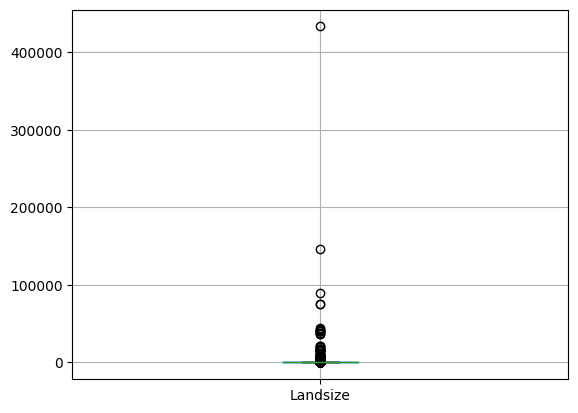

In [27]:
df_house_price.boxplot(column='Landsize', return_type='axes')

In [28]:
q75_landsize, q25_landsize = np.percentile(df_house_price['Landsize'], [75 ,25])
iqr_landsize = q75_landsize - q25_landsize
landsize_upper_limit =  q75_landsize + 1.5*iqr_landsize
print(landsize_upper_limit)

953.5


In [29]:
df_house_price.loc[df_house_price['Landsize'] >  landsize_upper_limit] = df_house_price['Landsize'].median()
df_house_price['Landsize'].describe()

count    27244.000000
mean       460.732528
std        208.331122
min          0.000000
25%        351.000000
50%        512.000000
75%        560.000000
max        953.000000
Name: Landsize, dtype: float64

<Axes: >

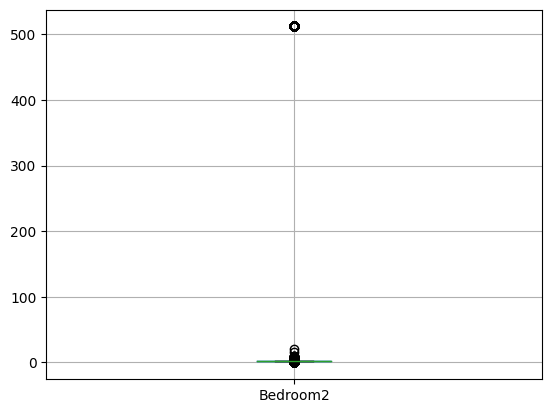

In [30]:
df_house_price.boxplot(column='Bedroom2', return_type='axes')

In [31]:
# Bedroom2_upper_limit = 10
df_house_price.loc[df_house_price['Bedroom2'] >  10] = df_house_price['Bathroom'].mode()[0]
df_house_price['Bedroom2'].value_counts()

Bedroom2
3.0     15586
4.0      4547
2.0      4399
1.0      1693
5.0       890
6.0        85
7.0        17
0.0        15
8.0         7
10.0        4
9.0         1
Name: count, dtype: int64

<Axes: >

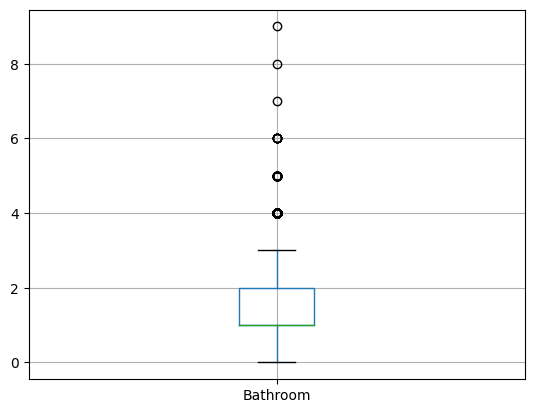

In [32]:
df_house_price.boxplot(column=['Bathroom'], return_type='axes')

In [33]:
df_house_price.loc[df_house_price['Bathroom'] >  6] = df_house_price['Bathroom'].mode()[0]
df_house_price['Bathroom'].value_counts()

Bathroom
1.0    17526
2.0     8064
3.0     1423
4.0      152
5.0       38
0.0       33
6.0        8
Name: count, dtype: int64

<Axes: >

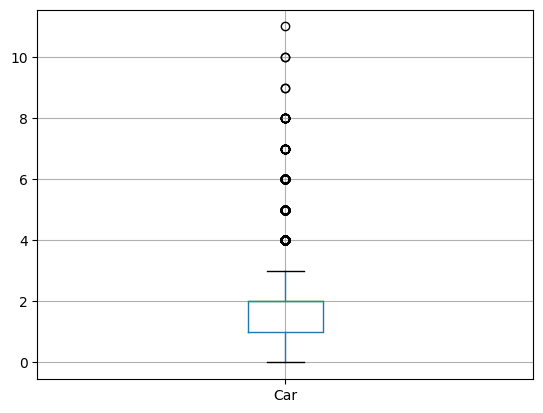

In [34]:
df_house_price.boxplot(column='Car', return_type='axes')

In [35]:
df_house_price.loc[df_house_price['Car'] >  6] = df_house_price['Car'].mode()[0]
df_house_price['Car'].value_counts()

Car
2.0    15823
1.0     8021
0.0     1209
3.0     1169
4.0      832
5.0      101
6.0       89
Name: count, dtype: int64

<Axes: >

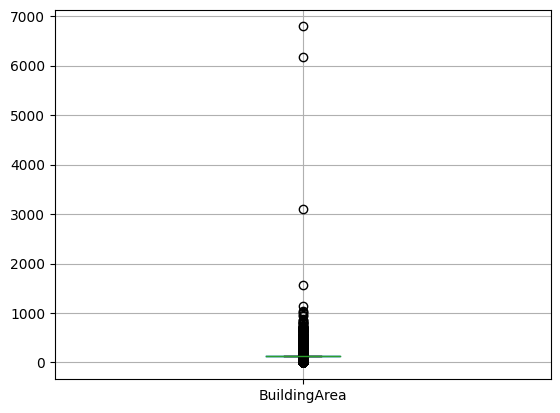

In [36]:
df_house_price.boxplot(column='BuildingArea', return_type='axes')

In [37]:
q75_BuildingArea, q25_BuildingArea = np.percentile(df_house_price['BuildingArea'], [75 ,25])
iqr_BuildingArea = q75_BuildingArea - q25_BuildingArea
BuildingArea_upper_limit =  q75_BuildingArea + 1.5*iqr_BuildingArea
print(BuildingArea_upper_limit)

133.0


In [38]:
df_house_price.loc[df_house_price['BuildingArea'] >  landsize_upper_limit] = df_house_price['BuildingArea'].median()
df_house_price['BuildingArea'].describe()

count    27244.000000
mean       134.131969
std         57.583558
min          0.000000
25%        133.000000
50%        133.000000
75%        133.000000
max        934.000000
Name: BuildingArea, dtype: float64

#Feature Engineering


In [39]:
import datetime

In [40]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
df_house_price = pd.read_csv(file_path)

# Convert 'Date' column to datetime with dayfirst=True
df_house_price['Date'] = pd.to_datetime(df_house_price['Date'], dayfirst=True, errors='coerce')

# Convert 'YearBuilt' column to datetime using the correct format, handle missing values
df_house_price['YearBuilt'] = pd.to_datetime(df_house_price['YearBuilt'].dropna().astype(int), format='%Y', errors='coerce')

# Calculate the age of the house, handling missing values
df_house_price['age_house'] = df_house_price['Date'].dt.year - df_house_price['YearBuilt'].dt.year

# Display the first few rows of the resulting DataFrame
print(df_house_price[['Date', 'YearBuilt', 'age_house']].head())


        Date  YearBuilt  age_house
0 2016-09-03        NaT        NaN
1 2016-12-03        NaT        NaN
2 2016-02-04 1900-01-01      116.0
3 2016-02-04        NaT        NaN
4 2017-03-04 1900-01-01      117.0


In [41]:
df_house_price['age_house'].describe()

count    15550.000000
mean        51.426945
std         36.759921
min        -90.000000
25%         17.000000
50%         47.000000
75%         76.000000
max        217.000000
Name: age_house, dtype: float64

In [42]:
# Droping 'yearbuilt' and 'date'
df_house_price = df_house_price.drop(['YearBuilt','Date'], axis=1)


#One hot encoding


In [43]:
# Replacing Type with a one-hot vector of length 6
cols = pd.get_dummies(df_house_price['Type'], prefix= 'Type')
df_house_price[cols.columns] = cols
df_house_price.drop('Type', axis = 1, inplace = True)
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Price          27247 non-null  float64
 4   Method         34857 non-null  object 
 5   SellerG        34857 non-null  object 
 6   Distance       34856 non-null  float64
 7   Postcode       34856 non-null  float64
 8   Bedroom2       26640 non-null  float64
 9   Bathroom       26631 non-null  float64
 10  Car            26129 non-null  float64
 11  Landsize       23047 non-null  float64
 12  BuildingArea   13742 non-null  float64
 13  CouncilArea    34854 non-null  object 
 14  Lattitude      26881 non-null  float64
 15  Longtitude     26881 non-null  float64
 16  Regionname     34854 non-null  object 
 17  Propertycount  34854 non-null  float64
 18  age_ho

In [44]:
# Replacing Method with a one-hot vector of length 8
cols = pd.get_dummies(df_house_price['Method'], prefix= 'Method')
df_house_price[cols.columns] = cols
df_house_price.drop('Method', axis = 1, inplace = True)
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Price          27247 non-null  float64
 4   SellerG        34857 non-null  object 
 5   Distance       34856 non-null  float64
 6   Postcode       34856 non-null  float64
 7   Bedroom2       26640 non-null  float64
 8   Bathroom       26631 non-null  float64
 9   Car            26129 non-null  float64
 10  Landsize       23047 non-null  float64
 11  BuildingArea   13742 non-null  float64
 12  CouncilArea    34854 non-null  object 
 13  Lattitude      26881 non-null  float64
 14  Longtitude     26881 non-null  float64
 15  Regionname     34854 non-null  object 
 16  Propertycount  34854 non-null  float64
 17  age_house      15550 non-null  float64
 18  Type_h

In [45]:
# Replacing Regionname with a one-hot vector of length 11
cols = pd.get_dummies(df_house_price['Regionname'], prefix= 'Regionname')
df_house_price[cols.columns] = cols
df_house_price.drop('Regionname', axis = 1, inplace = True)
df_house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Suburb                                 34857 non-null  object 
 1   Address                                34857 non-null  object 
 2   Rooms                                  34857 non-null  int64  
 3   Price                                  27247 non-null  float64
 4   SellerG                                34857 non-null  object 
 5   Distance                               34856 non-null  float64
 6   Postcode                               34856 non-null  float64
 7   Bedroom2                               26640 non-null  float64
 8   Bathroom                               26631 non-null  float64
 9   Car                                    26129 non-null  float64
 10  Landsize                               23047 non-null  float64
 11  Bu

In [46]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# y = df_house_price["Price"]
# X = df_house_price.drop('Price', axis = 1)

# X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, random_state = 24)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train_orig)
# X_test = scaler.transform(X_test_orig)
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
df_house_price = pd.read_csv(file_path)

# Drop rows with missing target values
df_house_price = df_house_price.dropna(subset=['Price'])

# Separate features and target variable
X = df_house_price.drop(columns=['Price'])
y = df_house_price['Price']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline for numeric and categorical data
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train_orig)
X_test = preprocessor.transform(X_test_orig)

# Display the transformed data
print("Transformed X_train shape:", X_train.shape)
print("Transformed X_test shape:", X_test.shape)


Transformed X_train shape: (21797, 22285)
Transformed X_test shape: (5450, 22285)


In [47]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
df_house_price = pd.read_csv(file_path)

# Drop rows with missing target values
df_house_price = df_house_price.dropna(subset=['Price'])

# Separate features and target variable
X = df_house_price.drop(columns=['Price'])
y = df_house_price['Price']

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline for numeric and categorical data
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split data into training and test sets
X_train_orig, X_test_orig, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply preprocessing
X_train = preprocessor.fit_transform(X_train_orig)
X_test = preprocessor.transform(X_test_orig)

# Fit the Linear Regression model
lreg = LinearRegression()
lreg.fit(X_train, y_train)

# Print the train and test scores
print('Train Score for Linear Regression:', lreg.score(X_train, y_train))
print('Test Score for Linear Regression:', lreg.score(X_test, y_test))


Train Score for Linear Regression: 0.9998606418944157
Test Score for Linear Regression: -0.4043913800558887


In [48]:
#Ridge(random_state = 0)
from sklearn.linear_model import Ridge

ridge = Ridge(random_state= 0)
ridge.fit(X_train, y_train)

print('Train Score for Ridge Regression:', ridge.score(X_train, y_train))
print('Test Score for Ridge Regression:', ridge.score(X_test, y_test))

Train Score for Ridge Regression: 0.9220771834795446
Test Score for Ridge Regression: 0.6633667180836051


In [49]:
#Lasso(random_state = 0)
from sklearn.linear_model import Lasso

lasso = Lasso(random_state= 0)
lasso.fit(X_train, y_train)

print('Train Score for Lasso Regression:', lasso.score(X_train, y_train))
print('Test Score for Lasso Regression:', lasso.score(X_test, y_test))

Train Score for Lasso Regression: 0.9967788697209349
Test Score for Lasso Regression: 0.6234347342307434


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:592: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 102965486933891.72, tolerance: 888233159035.6412
  model = cd_fast.sparse_enet_coordinate_descent(



#Polynomial Regression


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
data = pd.read_csv(file_path)

# Select features and target variable
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = data[features]
y = data['Price']

# Handle missing values by dropping rows with NaN values
data_clean = data.dropna(subset=['Price'])
X = data_clean[features].dropna()
y = data_clean['Price'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial regression
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

train_score = polreg.score(X_train_poly, y_train)
test_score = polreg.score(X_test_poly, y_test)

print('Train Score for Polynomial Regression:', train_score)
print('Test Score for Polynomial Regression:', test_score)


Train Score for Polynomial Regression: 0.7049457019341998
Test Score for Polynomial Regression: 0.6489742144354267


In [4]:
#DecisionTreeRegressor(max_depth = 2, random_state= 0)
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth = 2, random_state= 0)
dr.fit(X_train, y_train)

print('Train Score for Decision Tree Regression:', dr.score(X_train, y_train))
print('Test Score for Decision Tree Regression:', dr.score(X_test, y_test))

Train Score for Decision Tree Regression: 0.4112609696672661
Test Score for Decision Tree Regression: 0.36670905431500456


In [5]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

print('Train Score for KNN Regression:', knn.score(X_train, y_train))
print('Test Score for KNN Regression:', knn.score(X_test, y_test))

Train Score for KNN Regression: 0.7017025911039803
Test Score for KNN Regression: 0.4788903855065443


In [6]:
#SVR()
from sklearn.svm import SVR

svr = SVR()
svr.fit(X_train, y_train)

print('Train Score for SVM Regression:', svr.score(X_train, y_train))
print('Test Score for SVM Regression:', svr.score(X_test, y_test))

Train Score for SVM Regression: -0.08225224876824844
Test Score for SVM Regression: -0.08005869806176702


In [7]:
svr_rbf = SVR(kernel = 'rbf')
svr_rbf.fit(X_train, y_train)

print('Train Score for SVM rbf Regression:', svr_rbf.score(X_train, y_train))
print('Test Score for SVM rbf Regression:', svr_rbf.score(X_test, y_test))

Train Score for SVM rbf Regression: -0.08225224876824844
Test Score for SVM rbf Regression: -0.08005869806176702


In [8]:
svr_poly = SVR(kernel = 'poly')
svr_poly.fit(X_train, y_train)

print('Train Score for SVM poly Regression:', svr_poly.score(X_train, y_train))
print('Test Score for SVM poly Regression:', svr_poly.score(X_test, y_test))

Train Score for SVM poly Regression: -0.082011448736099
Test Score for SVM poly Regression: -0.07983036547465883


In [9]:
svr_linear = SVR(kernel = 'linear')
svr_linear.fit(X_train, y_train)

print('Train Score for SVM linear Regression:', svr_linear.score(X_train, y_train))
print('Test Score for SVM linear Regression:', svr_linear.score(X_test, y_test))

Train Score for SVM linear Regression: 0.3706079698230069
Test Score for SVM linear Regression: 0.402298777402864



#Grid Search with Cross-Validation


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
data = pd.read_csv(file_path)

# Select features and target variable
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = data[features]
y = data['Price']

# Handle missing values by dropping rows with NaN values
data_clean = data.dropna(subset=['Price'])
X = data_clean[features].dropna()
y = data_clean['Price'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Polynomial Regression
polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

train_score = polreg.score(X_train_poly, y_train)
test_score = polreg.score(X_test_poly, y_test)

print('Train Score for Polynomial Regression:', train_score)
print('Test Score for Polynomial Regression:', test_score)

# Lasso Regression with GridSearchCV
lasso = Lasso(random_state=0)
param_grid = {'alpha': [10, 20, 30, 40, 50, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_poly, y_train)

# Best parameters and corresponding score
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
best_test_score = grid_search.score(X_test_poly, y_test)

print("Best parameters:", best_params)
print("Best cross-validation score (train): {:.2f}".format(best_train_score))
print("Test set score with best parameters: {:.2f}".format(best_test_score))


Train Score for Polynomial Regression: 0.7049457019341998
Test Score for Polynomial Regression: 0.6489742144354267
Parameter grid:
{'alpha': [10, 20, 30, 40, 50, 100]}
Best parameters: {'alpha': 10}
Best cross-validation score (train): 0.54
Test set score with best parameters: 0.60


In [12]:
x_range = [1, 10, 100, 1000, 10000]
train_score_list_lasso = []
test_score_list_lasso = []

for alpha in x_range:
    lasso = Lasso(alpha)
    lasso.fit(X_train,y_train)
    train_score_list_lasso.append(lasso.score(X_train,y_train))
    test_score_list_lasso.append(lasso.score(X_test, y_test))

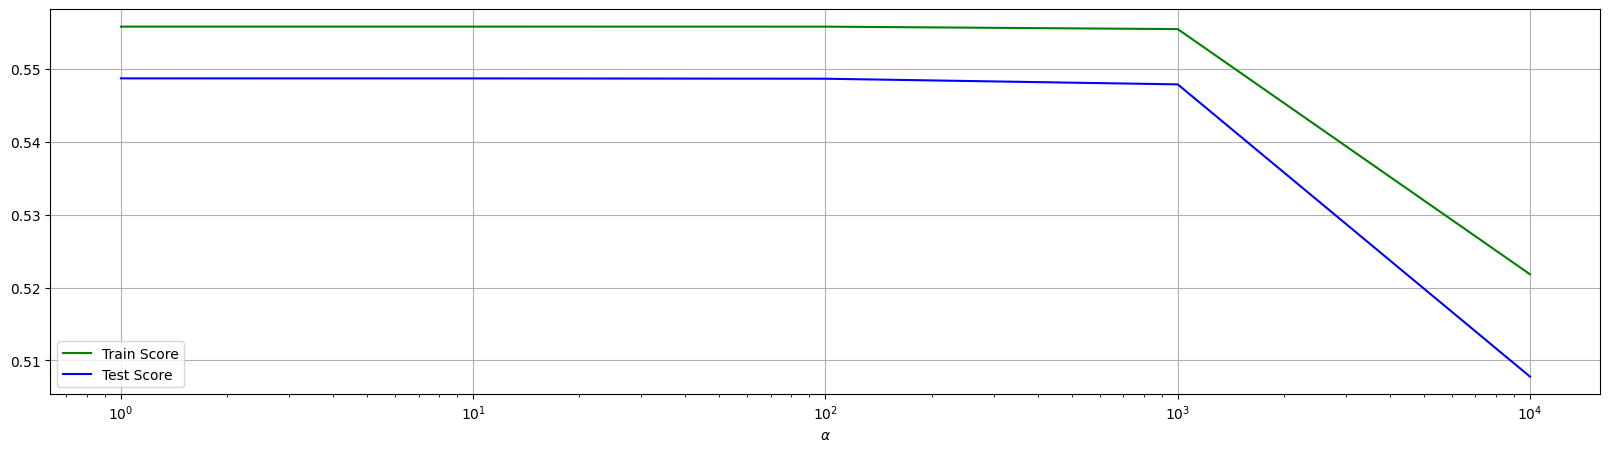

In [14]:
import matplotlib.pyplot as plt
import pylab as plt
%matplotlib inline
plt.subplots(figsize = (20,5))
plt.plot(x_range, train_score_list_lasso, c = 'g', label = 'Train Score')
plt.plot(x_range, test_score_list_lasso, c = 'b', label = 'Test Score')
plt.xscale('log')
plt.legend(loc = 3)
plt.xlabel(r'$\alpha$')
plt.grid()

In [15]:
lasso_best = Lasso(alpha=1000)
lasso_best.fit(X_train, y_train)

print('Train Score for best Lasso Regression:', lasso_best.score(X_train, y_train))
print('Test Score for best Lasso Regression:', lasso_best.score(X_test, y_test))

Train Score for best Lasso Regression: 0.555477820830488
Test Score for best Lasso Regression: 0.5478922768206946


In [16]:
knn = KNeighborsRegressor()
param_grid = {'n_neighbors': [1,5, 10, 50, 100, 500]}
print("Parameter grid:\n{}".format(param_grid))
grid_search_knn = GridSearchCV(knn,cv=5,
             param_grid=param_grid,
                return_train_score=True )
grid_search_knn.fit(X_train, y_train)

print("Best parameters for knn: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score for knn: {:.5f}".format(grid_search_knn.best_score_))

Parameter grid:
{'n_neighbors': [1, 5, 10, 50, 100, 500]}
Best parameters for knn: {'n_neighbors': 10}
Best cross-validation score for knn: 0.54648


In [17]:
train_score_array_knn = []
test_score_array_knn = []

for k in range(1,20):
    knn = KNeighborsRegressor(k)
    knn.fit(X_train, y_train)
    train_score_array_knn.append(knn.score(X_train, y_train))
    test_score_array_knn.append(knn.score(X_test, y_test))

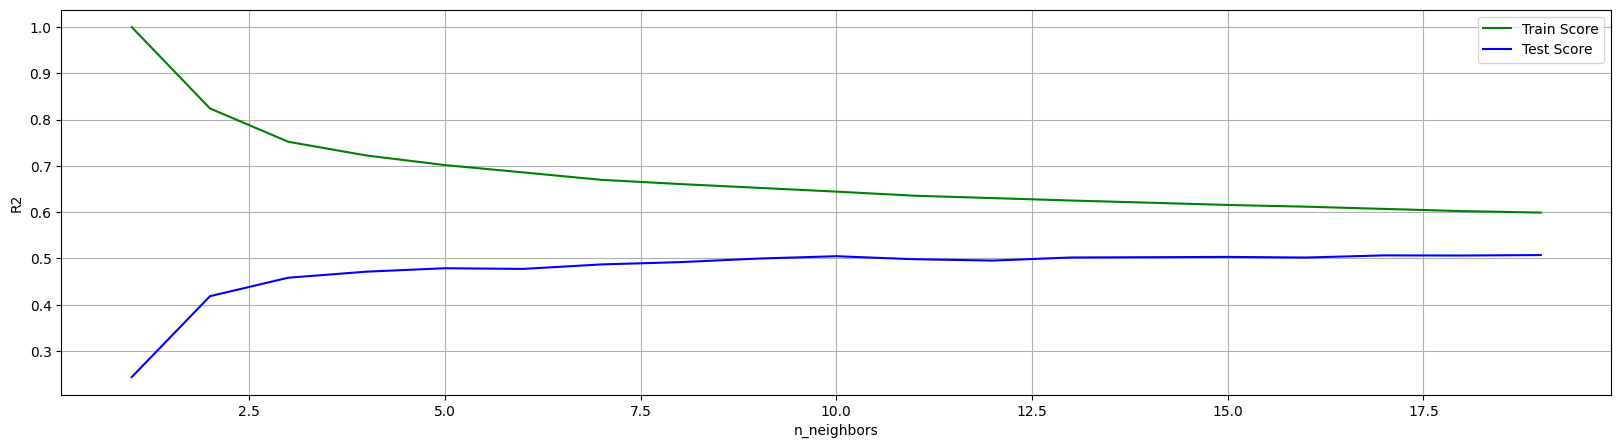

In [18]:
x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(x_axis, train_score_array_knn, label = 'Train Score', c = 'g')
plt.plot(x_axis, test_score_array_knn, label = 'Test Score', c='b')
plt.xlabel('n_neighbors')
plt.ylabel('R2')
# plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn_best = KNeighborsRegressor(n_neighbors=10)
knn_best.fit(X_train, y_train)

print('Train Score for best KNN Regression:', knn_best.score(X_train, y_train))
print('Test Score for best KNN Regression:', knn_best.score(X_test, y_test))

Train Score for best KNN Regression: 0.6443701000997972
Test Score for best KNN Regression: 0.5048573623664079


In [21]:
tree = DecisionTreeRegressor()

param_grid = {'max_depth': [1, 5, 10, 25, 50]}

print("Parameter grid:\n{}".format(param_grid))
grid_search_dr = GridSearchCV(tree, param_grid, cv=5,
                  scoring="r2", return_train_score=True )
grid_search_dr.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_dr.best_params_))
print("Best cross-validation score: {:.5f}".format(grid_search_dr.best_score_))

Parameter grid:
{'max_depth': [1, 5, 10, 25, 50]}
Best parameters: {'max_depth': 10}
Best cross-validation score: 0.69411


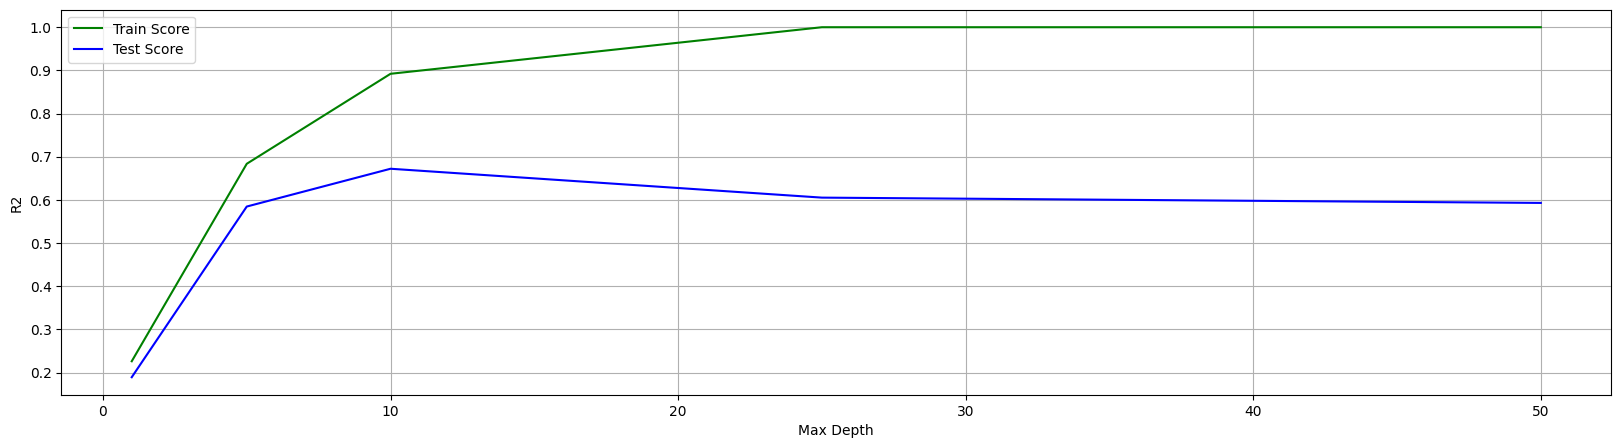

In [22]:
train_score_array_dr = []
test_score_array_dr = []
depth_range = [1, 5, 10, 25, 50]
for k in depth_range:
    tree = DecisionTreeRegressor(max_depth=k)
    tree.fit(X_train, y_train)
    train_score_array_dr.append(tree.score(X_train, y_train))
    test_score_array_dr.append(tree.score(X_test, y_test))


x_axis = range(1,20)
%matplotlib inline

plt.subplots(figsize = (20,5))
plt.plot(depth_range, train_score_array_dr, label = 'Train Score', c = 'g')
plt.plot(depth_range, test_score_array_dr, label = 'Test Score', c='b')
plt.xlabel('Max Depth')
plt.ylabel('R2')
# plt.xticks(x_axis, np.arange(20))
plt.grid()
plt.legend()

In [23]:
dr_best = DecisionTreeRegressor(max_depth = 8)
dr_best.fit(X_train, y_train)

print('Train Score for best Decision Tree Regression:', dr_best.score(X_train, y_train))
print('Test Score for best Decision Tree Regression:', dr_best.score(X_test, y_test))

Train Score for best Decision Tree Regression: 0.8243176687052023
Test Score for best Decision Tree Regression: 0.6775117368982917



#Bagging and Pasting


In [24]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# dt_reg = DecisionTreeRegressor(random_state=0, max_depth = 3)
bag_reg_dt= BaggingRegressor(dr_best, bootstrap=True, random_state=0)
bag_reg_dt.fit(X_train, y_train)
print('Train Score for Baaging on DecisionTreeRegressor:', bag_reg_dt.score(X_train, y_train))
print('Test Score for Baaging on DecisionTreeRegressor:', bag_reg_dt.score(X_test, y_test))

Train Score for Baaging on DecisionTreeRegressor: 0.8516044633983626
Test Score for Baaging on DecisionTreeRegressor: 0.7299284017289118


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
bag_reg_rf= BaggingRegressor(rf_reg,bootstrap=True, random_state=0)
bag_reg_rf.fit(X_train, y_train)
print('Train Score for Baaging on RandomForest Regression:', bag_reg_rf.score(X_train, y_train))
print('Test Score for Baaging on RandomForest Regression:', bag_reg_rf.score(X_test, y_test))

Train Score for Baaging on RandomForest Regression: 0.9310401725827764
Test Score for Baaging on RandomForest Regression: 0.7758929704441513


In [26]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
# dt_reg = DecisionTreeRegressor(random_state=0, max_depth = 3)
paste_reg_dt= BaggingRegressor(dr_best, bootstrap=False, random_state=0)
paste_reg_dt.fit(X_train, y_train)
print('Train Score for Pasting on DecisionTreeRegressor:', paste_reg_dt.score(X_train, y_train))
print('Test Score for Pasting on DecisionTreeRegressor:', paste_reg_dt.score(X_test, y_test))

Train Score for Pasting on DecisionTreeRegressor: 0.8245264648242377
Test Score for Pasting on DecisionTreeRegressor: 0.6703421929397568


In [27]:
paste_reg_rf= BaggingRegressor(rf_reg,bootstrap=False,random_state=0)
paste_reg_rf.fit(X_train, y_train)

print('Train Score for Pasting on RandomForest Regression:', paste_reg_rf.score(X_train, y_train))
print('Test Score for Pasting on RandomForest Regression:', paste_reg_rf.score(X_test, y_test))

Train Score for Pasting on RandomForest Regression: 0.9755951211492832
Test Score for Pasting on RandomForest Regression: 0.7800980746346496



#Adaboosting


In [28]:
from sklearn.ensemble import AdaBoostRegressor
# knn = KNeighborsRegressor()
Knn_reg_ada = AdaBoostRegressor(knn_best,random_state=0 )
Knn_reg_ada.fit(X_train, y_train)

print('Train Score for Pasting Adaboost on KNN Regression:', Knn_reg_ada.score(X_train, y_train))
print('Test Score for Pasting Adaboost on KNN Regression:', Knn_reg_ada.score(X_test, y_test))

Train Score for Pasting Adaboost on KNN Regression: 0.7727706069223097
Test Score for Pasting Adaboost on KNN Regression: 0.3234458065511058


In [29]:
# rf_reg = RandomForestRegressor()
ada_reg_rf= AdaBoostRegressor(rf_reg,random_state=0)
ada_reg_rf.fit(X_train, y_train)

print('Train Score for Pasting Adaboost on RandomForest Regression:', ada_reg_rf.score(X_train, y_train))
print('Test Score for Pasting Adaboost on RandomForest Regression:', ada_reg_rf.score(X_test, y_test))

Train Score for Pasting Adaboost on RandomForest Regression: 0.9807293575971956
Test Score for Pasting Adaboost on RandomForest Regression: 0.7820371904856853


In [30]:
from sklearn.ensemble import GradientBoostingRegressor
grad_reg = GradientBoostingRegressor(random_state=0)
grad_reg.fit(X_train, y_train)

print('Train Score for GradientBoosting Regression:', grad_reg.score(X_train, y_train))
print('Test Score for GradientBoosting Regression:', grad_reg.score(X_test, y_test))

Train Score for GradientBoosting Regression: 0.8413817331010053
Test Score for GradientBoosting Regression: 0.7442415551891042


#PCA

In [35]:
from sklearn.decomposition import PCA
import numpy as np
# reduce the dimensionality
pca = PCA(n_components= 0.95, svd_solver = 'full')
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)



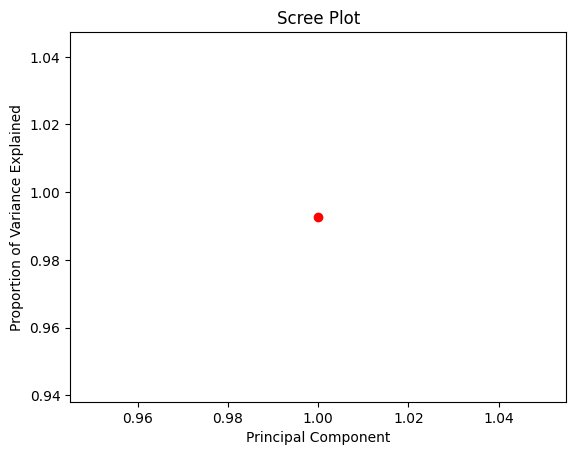

In [36]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [37]:
pca.explained_variance_ratio_

array([0.99269217])

In [38]:
dr_best.fit(X_train_pca, y_train)

print('Train Score for Decision Tree Regression using PCA:', dr_best.score(X_train_pca, y_train))
print('Test Score for Decision Tree Regression using PCA:', dr_best.score(X_test_pca, y_test))

Train Score for Decision Tree Regression using PCA: 0.19755664503184278
Test Score for Decision Tree Regression using PCA: 0.11554572536084184


In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
data = pd.read_csv(file_path)

# Select features and target variable
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = data[features]
y = data['Price']

# Handle missing values by dropping rows with NaN values
data_clean = data.dropna(subset=['Price'])
X = data_clean[features].dropna()
y = data_clean['Price'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Polynomial Regression
polreg = LinearRegression()
polreg.fit(X_train_poly, y_train)

train_score = polreg.score(X_train_poly, y_train)
test_score = polreg.score(X_test_poly, y_test)

print('Train Score for Polynomial Regression:', train_score)
print('Test Score for Polynomial Regression:', test_score)

# Lasso Regression with GridSearchCV
lasso = Lasso(random_state=0)
param_grid = {'alpha': [10, 20, 30, 40, 50, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_poly, y_train)

# Best parameters and corresponding score
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
best_test_score = grid_search.score(X_test_poly, y_test)

print("Best parameters:", best_params)
print("Best cross-validation score (train): {:.2f}".format(best_train_score))
print("Test set score with best parameters: {:.2f}".format(best_test_score))


Train Score for Polynomial Regression: 0.7049457019341998
Test Score for Polynomial Regression: 0.6489742144354267
Parameter grid:
{'alpha': [10, 20, 30, 40, 50, 100]}
Best parameters: {'alpha': 10}
Best cross-validation score (train): 0.54
Test set score with best parameters: 0.60


In [43]:
knn.fit(X_train_pca, y_train)

print('Train Score for KNN Regression using PCA:', knn.score(X_train_pca, y_train))
print('Test Score for KNN Regression using PCA:', knn.score(X_test_pca, y_test))

Train Score for KNN Regression using PCA: 0.18096626299409257
Test Score for KNN Regression using PCA: 0.06083195237762484


In [45]:
svr.fit(X_train_pca, y_train)

print('Train Score for SVRegression using PCA:', svr.score(X_train_pca, y_train))
print('Test Score for SVRegression using PCA:', svr.score(X_test_pca, y_test))

Train Score for SVRegression using PCA: -0.08224293962290918
Test Score for SVRegression using PCA: -0.08005091388168406


#Deep learning model

In [46]:
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [47]:
# step 1: build the model
model = Sequential()
model.add(Dense(32, input_dim = 35, activation='relu', kernel_initializer = 'zero', name = 'input_layer'))
#model.add(Dense(16, activation='relu', kernel_initializer = 'zero', name = 'hidden_layer'))
model.add(Dense(1, activation = 'softmax', name = 'output_layer'))

In [48]:
# step 2: Compile the model
model.compile(optimizer = 'adam', loss='mse', metrics=['mae','mse'])

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
data = pd.read_csv(file_path)

# Select features and target variable
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = data[features]
y = data['Price']

# Handle missing values by dropping rows with NaN values
data_clean = data.dropna(subset=['Price'])
X = data_clean[features].dropna()
y = data_clean['Price'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train_poly.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_poly, y_train, batch_size=128, epochs=20)

# Evaluate the model
train_score = model.evaluate(X_train_poly, y_train)
test_score = model.evaluate(X_test_poly, y_test)

print('Train Score for Neural Network:', train_score)
print('Test Score for Neural Network:', test_score)

# Lasso Regression with GridSearchCV
lasso = Lasso(random_state=0)
param_grid = {'alpha': [10, 20, 30, 40, 50, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_poly, y_train)

# Best parameters and corresponding score
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
best_test_score = grid_search.score(X_test_poly, y_test)

print("Best parameters:", best_params)
print("Best cross-validation score (train): {:.2f}".format(best_train_score))
print("Test set score with best parameters: {:.2f}".format(best_test_score))


Epoch 1/20
57/57 [==============================] - 2s 6ms/step - loss: 1667956736000.0000
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 1667876257792.0000
Epoch 3/20
57/57 [==============================] - 0s 4ms/step - loss: 1667574923264.0000
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 1666849046528.0000
Epoch 5/20
57/57 [==============================] - 0s 3ms/step - loss: 1665489829888.0000
Epoch 6/20
57/57 [==============================] - 0s 4ms/step - loss: 1663293456384.0000
Epoch 7/20
57/57 [==============================] - 0s 6ms/step - loss: 1660099100672.0000
Epoch 8/20
57/57 [==============================] - 0s 5ms/step - loss: 1655751049216.0000
Epoch 9/20
57/57 [==============================] - 0s 4ms/step - loss: 1650057019392.0000
Epoch 10/20
57/57 [==============================] - 0s 6ms/step - loss: 1642913071104.0000
Epoch 11/20
57/57 [==============================] - 0s 4ms/step - loss: 1634123644928.00

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/content/drive/MyDrive/Melbourne_housing_FULL.csv'
data = pd.read_csv(file_path)

# Select features and target variable
features = ['Rooms', 'Distance', 'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude']
X = data[features]
y = data['Price']

# Handle missing values by dropping rows with NaN values
data_clean = data.dropna(subset=['Price'])
X = data_clean[features].dropna()
y = data_clean['Price'].loc[X.index]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_poly = scaler.fit_transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

# Define the neural network model
model = Sequential()
model.add(Dense(64, input_shape=(X_train_poly.shape[1],), activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train_poly, y_train, batch_size=128, epochs=20)

# Step 4: Model evaluation
train_loss = model.evaluate(X_train_poly, y_train)
test_loss = model.evaluate(X_test_poly, y_test)

print("Train Loss:", train_loss)
print("Test Loss:", test_loss)

# Lasso Regression with GridSearchCV
lasso = Lasso(random_state=0)
param_grid = {'alpha': [10, 20, 30, 40, 50, 100]}
print("Parameter grid:\n{}".format(param_grid))

grid_search = GridSearchCV(lasso, param_grid, cv=5, return_train_score=True)
grid_search.fit(X_train_poly, y_train)

# Best parameters and corresponding score
best_params = grid_search.best_params_
best_train_score = grid_search.best_score_
best_test_score = grid_search.score(X_test_poly, y_test)

print("Best parameters:", best_params)
print("Best cross-validation score (train): {:.2f}".format(best_train_score))
print("Test set score with best parameters: {:.2f}".format(best_test_score))


Epoch 1/20
57/57 [==============================] - 2s 5ms/step - loss: 1667959750656.0000
Epoch 2/20
57/57 [==============================] - 0s 5ms/step - loss: 1667888840704.0000
Epoch 3/20
57/57 [==============================] - 0s 4ms/step - loss: 1667625254912.0000
Epoch 4/20
57/57 [==============================] - 0s 4ms/step - loss: 1666975399936.0000
Epoch 5/20
57/57 [==============================] - 0s 5ms/step - loss: 1665741094912.0000
Epoch 6/20
57/57 [==============================] - 0s 5ms/step - loss: 1663772131328.0000
Epoch 7/20
57/57 [==============================] - 1s 11ms/step - loss: 1660887367680.0000
Epoch 8/20
57/57 [==============================] - 0s 8ms/step - loss: 1656983650304.0000
Epoch 9/20
57/57 [==============================] - 1s 9ms/step - loss: 1651862536192.0000
Epoch 10/20
57/57 [==============================] - 0s 8ms/step - loss: 1645436993536.0000
Epoch 11/20
57/57 [==============================] - 0s 4ms/step - loss: 1637569921024.0